# 01. Parse Historical Finance Data with BeatifulSoup

###  parse historical finance data @ [NAVER 금융](http://finance.naver.com) 

In [1]:
from financeDataParser import FinanceDataParser

- **src: [financeDataParser.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/financeDataParser.py)**

In [2]:
parser = FinanceDataParser()

 - **e.g. [삼성전자(보통주) 일별 시세 주소](http://finance.naver.com/item/sise_day.nhn?code=005930)**

In [3]:
quotes = parser.quotes_historical_finance(start_date='2016.01.01')

0.	fetching quote history for "두산"
1.	fetching quote history for "기아차"
2.	fetching quote history for "sk하이닉스"
3.	fetching quote history for "한화"
4.	fetching quote history for "CJ"
5.	fetching quote history for "대한항공"
6.	fetching quote history for "현대제철"
7.	fetching quote history for "신세계"
8.	fetching quote history for "효성"
9.	fetching quote history for "현대차"
10.	fetching quote history for "삼성전자"
11.	fetching quote history for "오뚜기"
12.	fetching quote history for "호텔신라"
13.	fetching quote history for "현대중공업"
14.	fetching quote history for "한화케미칼"
15.	fetching quote history for "삼성중공업"
16.	fetching quote history for "S오일"
17.	fetching quote history for "SKT"
18.	fetching quote history for "아시아나항공"
19.	fetching quote history for "기업은행"
20.	fetching quote history for "삼성카드"
21.	fetching quote history for "KT"
22.	fetching quote history for "LG유플러스"
23.	fetching quote history for "LG디스플레이"
24.	fetching quote history for "SK"
25.	fetching quote history for "네이버"
26.	fetching quote history fo

---

# 02. Show Historical Finance Data

In [4]:
from dataDecorator import DataDecorator

- **src: [dataDecorator.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/dataDecorator.py)**

### 02_01. pandas dataframe

In [5]:
i = 11

In [6]:
names = parser.get_stock_names()
stock_items = parser.get_stock_items()

In [7]:
print('stock_name : {name}'.format(name=names[i]))
print('stock_item : {stock_item}'.format(stock_item=stock_items[i]))

stock_name : 오뚜기
stock_item : 007310


In [8]:
df = DataDecorator.set_dataframe(idx=i, quotes=quotes)

In [9]:
df

,close_prices,open_prices,high_prices,low_prices,volume
market_dates,,,,,
2016-01-04,1255000.0,1260000.0,1285000.0,1233000.0,5954.0
2016-01-05,1255000.0,1258000.0,1309000.0,1210000.0,9201.0
2016-01-06,1273000.0,1263000.0,1287000.0,1241000.0,8078.0
2016-01-07,1294000.0,1274000.0,1328000.0,1269000.0,5854.0
2016-01-08,1295000.0,1309000.0,1309000.0,1267000.0,4704.0
2016-01-11,1283000.0,1278000.0,1302000.0,1272000.0,4709.0
2016-01-12,1277000.0,1295000.0,1301000.0,1265000.0,4200.0
2016-01-13,1258000.0,1277000.0,1280000.0,1236000.0,7203.0
2016-01-14,1238000.0,1252000.0,1266000.0,1220000.0,6756.0


### 02_02. plotly candlestick-graph

In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.plotly as py

init_notebook_mode(connected=True)
fig = DataDecorator.set_candelstick_data(df=df, name=names[i], stock_item=stock_items[i])
py.iplot(fig, filename='candlestick')

- **link: [candlestick-graph](https://plot.ly/~JiHyunPark/5/_007310/)**

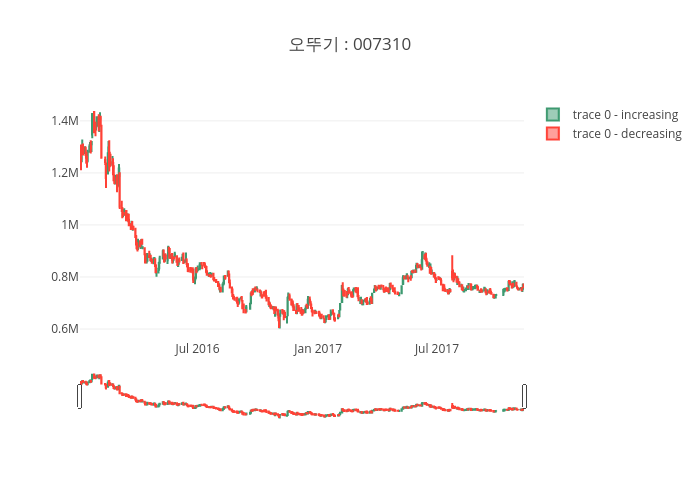

In [11]:
py.image.save_as(fig, filename='./fig/candlestick.png')
from IPython.display import Image
Image('./fig/candlestick.png', width=1300, height=900)

---

# 03. Clustering

### affinity propagation

In [12]:
from cluster import Cluster

- **src: [cluster.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/cluster.py)**
- **src: [dataDecorator.py](https://github.com/jhyun0919/skku_python_proj/blob/master/codes/dataDecorator.py)**

In [13]:
edge_model, embedding, names, n_labels, labels = Cluster.affinity(quotes=quotes)

Cluster 1: 기아차, 현대차, 삼성중공업
Cluster 2: sk하이닉스, 삼성전자, 카카오, JYP엔터
Cluster 3: 대한항공, 아시아나항공
Cluster 4: 신세계, 호텔신라, 현대백화점, 하이마트, 이마트
Cluster 5: 두산, 한화, 효성, 한화케미칼, LG화학
Cluster 6: 현대제철, S오일, sk이노베이션
Cluster 7: SKT, KT, LG유플러스, SK
Cluster 8: LG디스플레이, LG전자
Cluster 9: 현대중공업, 대우조선해양
Cluster 10: ncsoft, 한국한공우주, 셀트리온, 셀트리온제약
Cluster 11: sm엔터, LG생활건강, 아모레퍼시픽
Cluster 12: CJ, 오뚜기, CJ제일제당
Cluster 13: 기업은행, 삼성카드, 네이버, 신한지주, KB금융


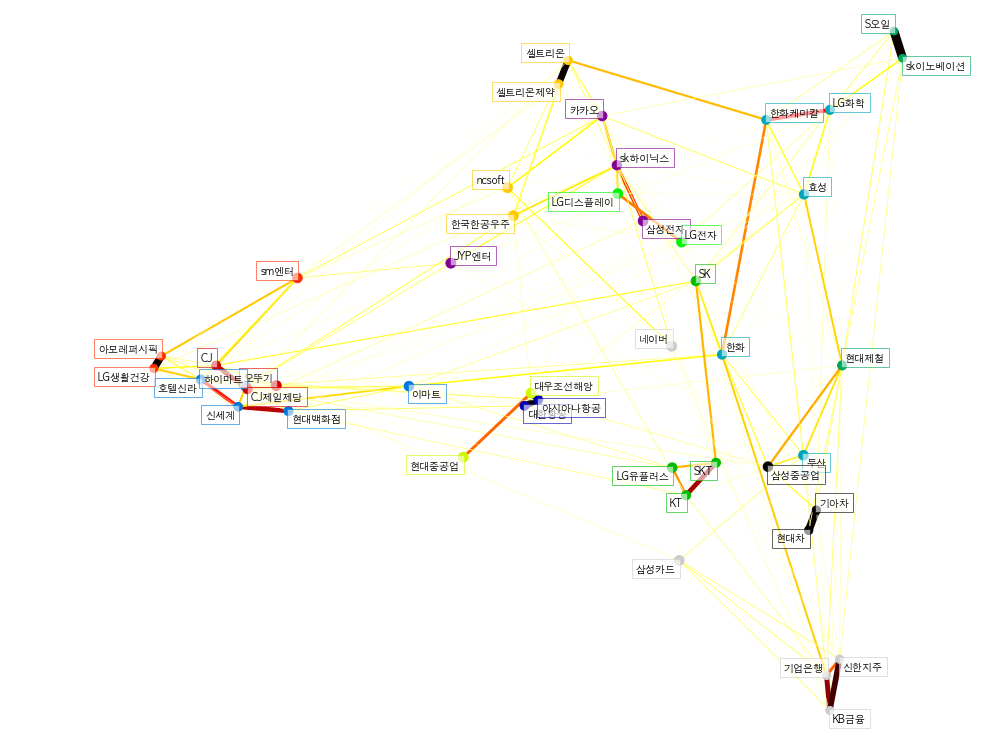

In [14]:
DataDecorator.show_cluster(edge_model, embedding, names, n_labels, labels)

---

# 04. Reference
* [NAVER를 통한 주식정보 크롤링 by Jaeyeon Baek](http://estenpark.tistory.com/353)
* [Visualizing the Stock Market Structure](http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html)
* [plotly : Candlestick-Chart](https://plot.ly/python/candlestick-charts/)